In [371]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier



In [372]:
df = pd.read_csv('../../resources/linux/log-structured/Linux.log_sequences.csv')

In [373]:
X = df.iloc[:, 1:-1].values
y = df["Severity"].values
print(X.shape, y.shape)

(225, 106) (225,)


In [374]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [375]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [376]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [377]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # one output neuron

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # logistic (sigmoid) activation

model = LogisticRegressionModel(input_dim=X_train.shape[1])

model = RandomForestClassifier(
    n_estimators=100,  # number of trees
    max_depth=None,    # let trees expand until all leaves are pure
    random_state=42
)


In [378]:
# criterion = nn.BCELoss()  # binary cross-entropy
# optimizer = optim.SGD(model.parameters(), lr=0.1)

In [379]:
# num_epochs = 50
#
# for epoch in range(num_epochs):
#     # Forward pass
#     outputs = model(X_train)
#     loss = criterion(outputs, y_train)
#
#     # Backward pass
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
#
#     # Print progress
#     if (epoch+1) % 100 == 0:
#         print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

model.fit(X_train, y_train)


C:\Users\yanth\PycharmProjects\neural-radiance-caching-demo\.venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [380]:
# with torch.no_grad():  # disables gradient computation
#     y_pred_probs = model(X_test)            # predicted probabilities, shape [N,1]
#     y_pred = (y_pred_probs > 0.5).float()   # convert probabilities to 0/1 labels

y_pred = model.predict(X_test)


In [381]:
y_pred_np = y_pred
y_test_np = y_test.numpy().flatten()

print("Predicted labels:", y_pred_np)

accuracy = accuracy_score(y_test_np, y_pred_np)
recall = recall_score(y_test_np, y_pred_np)
f1 = f1_score(y_test_np, y_pred_np)

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1:.2f}")


Predicted labels: [1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0.]
Accuracy: 95.56%
Recall: 100.00%
F1 Score: 0.95


In [382]:
event_names = list(df.columns)[1:-1] # if hasattr(X_train, 'columns') else [f"E{i+1}" for i in range (len(coefficients))]

# Get feature importances
feature_importance = pd.DataFrame({
    "EventId": event_names,
    "Importance": model.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

print(feature_importance.head(10))

     EventId  Importance
63  8f0f7d7f    0.299583
2   09789b2b    0.138157
74  a82d5ea6    0.136815
19  27624832    0.130945
28  39d9635b    0.112563
81  b780997e    0.061677
73  a757c0c2    0.047969
1   03649f38    0.013281
88  d64ff9d9    0.013200
53  6f97e9d4    0.007198


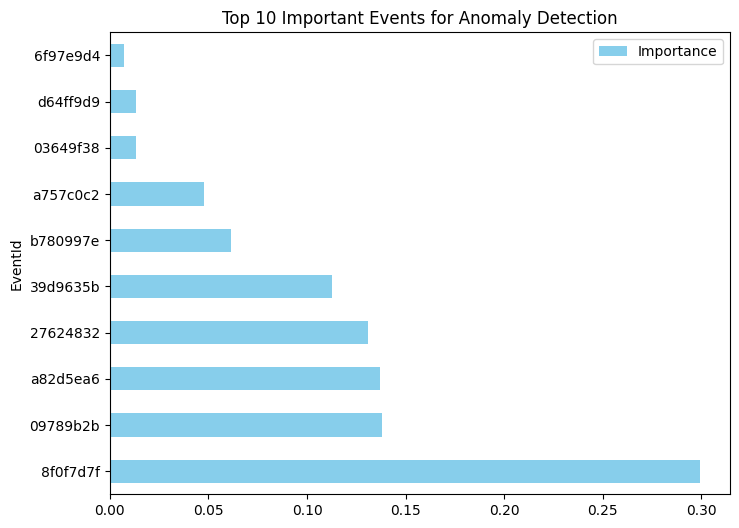

In [383]:
import matplotlib.pyplot as plt

feature_importance.head(10).plot(
    x="EventId", y="Importance", kind="barh", figsize=(8,6), color="skyblue"
)
plt.title("Top 10 Important Events for Anomaly Detection")
plt.show()
